In [1]:
import pandas as pd
from tqdm import tqdm
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1>pick a real world dataset with directed graph

In [3]:
with open('/content/drive/MyDrive/IR/Assignment 3/Assignment 3/p2p-Gnutella08.txt') as f:
    graph = f.readlines()[4:]

In [4]:
graph
len(graph)

20777

In [5]:
vertices = []
edges = []
for i in range(len(graph)):
  vertex1 = graph[i].split()[0]
  vertex2 = graph[i].split()[1]
  vertices.append(int(vertex1))
  vertices.append(int(vertex2))
  edges.append([int(vertex1),int(vertex2)])
vertices = set(vertices)
print(len(vertices))
vertices = list(vertices)
print(len(edges))

6301
20777


In [6]:
adjacency_list = {}
for i in range(len(graph)):
  edge1 = int(graph[i].split()[0])
  edge2 = int(graph[i].split()[1])
  if edge1 not in adjacency_list:
    adjacency_list[edge1] = []
    adjacency_list[edge1].append(edge2)
  else:
    adjacency_list[edge1].append(edge2)
adjacency_list

{0: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 3: [703, 826, 1097, 1287, 1591, 1895, 1896, 1897, 1898, 1899],
 4: [144, 258, 491, 1021, 1418, 1669, 1900, 1901, 1902, 1903],
 5: [121, 127, 128, 179, 247, 249, 264, 353, 424, 426],
 7: [145, 176, 177, 353, 753, 754, 762, 2064, 3002],
 8: [520, 665, 852, 1394, 1786, 1842, 1904, 1905, 1906, 1907],
 9: [124, 147, 177, 246, 247, 248, 249, 250, 251, 252],
 11: [12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
 13: [2074],
 14: [809],
 15: [3, 123, 129, 143, 251, 264, 367, 426, 427, 718],
 17: [1050, 2254, 2761, 3147, 3169, 3619, 3893, 4408, 4953],
 20: [121, 147, 368, 427, 717, 856, 975, 1908, 1909, 1910],
 21: [92, 1702, 1711, 1833, 1916, 1917, 1918, 1919, 1920, 1921],
 22: [23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
 25: [1022],
 27: [901, 960, 1511, 1624, 1836, 1911, 1912, 1913, 1914, 1915],
 28: [846, 1516, 1517],
 29: [962, 1656, 2201],
 30: [3, 5, 8, 121, 124, 126, 145, 174, 249, 424],
 31: [124, 637, 870, 1219, 1954, 2237, 2524, 2630, 3637, 3874],
 32: [9

In [7]:
edges

[[0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [0, 5],
 [0, 6],
 [0, 7],
 [0, 8],
 [0, 9],
 [0, 10],
 [3, 703],
 [3, 826],
 [3, 1097],
 [3, 1287],
 [3, 1591],
 [3, 1895],
 [3, 1896],
 [3, 1897],
 [3, 1898],
 [3, 1899],
 [4, 144],
 [4, 258],
 [4, 491],
 [4, 1021],
 [4, 1418],
 [4, 1669],
 [4, 1900],
 [4, 1901],
 [4, 1902],
 [4, 1903],
 [5, 121],
 [5, 127],
 [5, 128],
 [5, 179],
 [5, 247],
 [5, 249],
 [5, 264],
 [5, 353],
 [5, 424],
 [5, 426],
 [7, 145],
 [7, 176],
 [7, 177],
 [7, 353],
 [7, 753],
 [7, 754],
 [7, 762],
 [7, 2064],
 [7, 3002],
 [8, 520],
 [8, 665],
 [8, 852],
 [8, 1394],
 [8, 1786],
 [8, 1842],
 [8, 1904],
 [8, 1905],
 [8, 1906],
 [8, 1907],
 [9, 124],
 [9, 147],
 [9, 177],
 [9, 246],
 [9, 247],
 [9, 248],
 [9, 249],
 [9, 250],
 [9, 251],
 [9, 252],
 [11, 12],
 [11, 13],
 [11, 14],
 [11, 15],
 [11, 16],
 [11, 17],
 [11, 18],
 [11, 19],
 [11, 20],
 [11, 21],
 [13, 2074],
 [14, 809],
 [15, 3],
 [15, 123],
 [15, 129],
 [15, 143],
 [15, 251],
 [15, 264],
 [15, 367],
 [15, 426],
 [15, 4

<h1>Represent the network in terms of its ‘adjacency matrix’ as well as ‘edge list’.

In [8]:
adjacency_matrix = np.zeros([len(vertices),len(vertices)],dtype=int)
for edge in edges:
  first_dim = edge[0]
  second_dim = edge[1]
  adjacency_matrix[first_dim][second_dim]=1
adjacency_matrix.shape

(6301, 6301)

In [9]:
print("adjacency list :" ,adjacency_list)


adjacency list : {0: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 3: [703, 826, 1097, 1287, 1591, 1895, 1896, 1897, 1898, 1899], 4: [144, 258, 491, 1021, 1418, 1669, 1900, 1901, 1902, 1903], 5: [121, 127, 128, 179, 247, 249, 264, 353, 424, 426], 7: [145, 176, 177, 353, 753, 754, 762, 2064, 3002], 8: [520, 665, 852, 1394, 1786, 1842, 1904, 1905, 1906, 1907], 9: [124, 147, 177, 246, 247, 248, 249, 250, 251, 252], 11: [12, 13, 14, 15, 16, 17, 18, 19, 20, 21], 13: [2074], 14: [809], 15: [3, 123, 129, 143, 251, 264, 367, 426, 427, 718], 17: [1050, 2254, 2761, 3147, 3169, 3619, 3893, 4408, 4953], 20: [121, 147, 368, 427, 717, 856, 975, 1908, 1909, 1910], 21: [92, 1702, 1711, 1833, 1916, 1917, 1918, 1919, 1920, 1921], 22: [23, 24, 25, 26, 27, 28, 29, 30, 31, 32], 25: [1022], 27: [901, 960, 1511, 1624, 1836, 1911, 1912, 1913, 1914, 1915], 28: [846, 1516, 1517], 29: [962, 1656, 2201], 30: [3, 5, 8, 121, 124, 126, 145, 174, 249, 424], 31: [124, 637, 870, 1219, 1954, 2237, 2524, 2630, 3637, 3874], 32: [957, 

In [10]:
print("adjacency matrix ")
adjacency_matrix

adjacency matrix 


array([[0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
print ("no. of edges:", len(edges))
print ("no. of vertices:", len(vertices))

no. of edges: 20777
no. of vertices: 6301


In [12]:
#avg. no. of indegree and outdegree
max_outver = -1
list_outdegree = []
max_outdeg = -1
outdegree = {}
outdeg = 0
total_outdeg = 0
for i in range(len(adjacency_matrix)):
  outdeg = sum(adjacency_matrix[i])
  total_outdeg = total_outdeg+outdeg
  outdegree[i] = outdeg
  list_outdegree.append(outdeg)
  if(outdeg>max_outdeg):
    max_outdeg = outdeg
    max_outver = i
outdegree

{0: 10,
 1: 0,
 2: 0,
 3: 10,
 4: 10,
 5: 10,
 6: 0,
 7: 9,
 8: 10,
 9: 10,
 10: 0,
 11: 10,
 12: 0,
 13: 1,
 14: 1,
 15: 10,
 16: 0,
 17: 9,
 18: 0,
 19: 0,
 20: 10,
 21: 10,
 22: 10,
 23: 0,
 24: 0,
 25: 1,
 26: 0,
 27: 10,
 28: 3,
 29: 3,
 30: 10,
 31: 10,
 32: 9,
 33: 10,
 34: 0,
 35: 0,
 36: 10,
 37: 0,
 38: 9,
 39: 10,
 40: 0,
 41: 0,
 42: 0,
 43: 10,
 44: 10,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 9,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 10,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 9,
 61: 10,
 62: 9,
 63: 9,
 64: 10,
 65: 10,
 66: 10,
 67: 10,
 68: 10,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 10,
 74: 0,
 75: 10,
 76: 10,
 77: 0,
 78: 7,
 79: 0,
 80: 1,
 81: 10,
 82: 0,
 83: 10,
 84: 0,
 85: 0,
 86: 0,
 87: 10,
 88: 0,
 89: 10,
 90: 0,
 91: 3,
 92: 2,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 10,
 99: 0,
 100: 1,
 101: 10,
 102: 5,
 103: 0,
 104: 1,
 105: 10,
 106: 0,
 107: 0,
 108: 10,
 109: 10,
 110: 10,
 111: 10,
 112: 9,
 113: 10,
 114: 0,
 115: 0,
 116: 10,
 117: 0,
 118: 

In [13]:
print("Total outdegree :",total_outdeg)
print("Total vertices :",len(vertices))
print("Average outdegree :",total_outdeg/len(vertices))

Total outdegree : 20777
Total vertices : 6301
Average outdegree : 3.2974131090303125


In [14]:
indegree = {}
list_indegree = []
indeg = 0
total_indeg = 0
max_inver = -1
max_indeg = -1
for i in range(len(adjacency_matrix)):
  indeg = sum(adjacency_matrix[:,i])
  total_indeg = total_indeg+indeg
  indegree[i] = indeg
  list_indegree.append(indeg)
  if(indeg>max_indeg):
    max_indeg = indeg
    max_inver = i
indegree

{0: 0,
 1: 1,
 2: 6,
 3: 77,
 4: 59,
 5: 73,
 6: 1,
 7: 51,
 8: 74,
 9: 49,
 10: 7,
 11: 4,
 12: 1,
 13: 5,
 14: 5,
 15: 6,
 16: 2,
 17: 30,
 18: 4,
 19: 1,
 20: 7,
 21: 10,
 22: 0,
 23: 15,
 24: 2,
 25: 2,
 26: 1,
 27: 2,
 28: 2,
 29: 6,
 30: 4,
 31: 27,
 32: 6,
 33: 2,
 34: 2,
 35: 2,
 36: 3,
 37: 1,
 38: 21,
 39: 2,
 40: 1,
 41: 5,
 42: 2,
 43: 6,
 44: 0,
 45: 4,
 46: 1,
 47: 3,
 48: 3,
 49: 8,
 50: 7,
 51: 5,
 52: 1,
 53: 5,
 54: 4,
 55: 2,
 56: 10,
 57: 11,
 58: 5,
 59: 4,
 60: 3,
 61: 1,
 62: 3,
 63: 11,
 64: 5,
 65: 4,
 66: 0,
 67: 2,
 68: 2,
 69: 5,
 70: 1,
 71: 6,
 72: 1,
 73: 5,
 74: 1,
 75: 4,
 76: 6,
 77: 11,
 78: 6,
 79: 2,
 80: 2,
 81: 4,
 82: 4,
 83: 6,
 84: 1,
 85: 3,
 86: 7,
 87: 1,
 88: 1,
 89: 4,
 90: 1,
 91: 2,
 92: 13,
 93: 3,
 94: 4,
 95: 4,
 96: 12,
 97: 3,
 98: 0,
 99: 2,
 100: 3,
 101: 4,
 102: 12,
 103: 7,
 104: 2,
 105: 3,
 106: 9,
 107: 6,
 108: 9,
 109: 0,
 110: 8,
 111: 4,
 112: 7,
 113: 11,
 114: 4,
 115: 7,
 116: 5,
 117: 9,
 118: 4,
 119: 4,
 120: 2,
 1

In [15]:
print("Total indegree :",total_indeg)
print("Total vertices :",len(vertices))
print("Average indegree :",total_indeg/len(vertices))

Total indegree : 20777
Total vertices : 6301
Average indegree : 3.2974131090303125


In [16]:
print ("maximum In-degree :", max_indeg)
print ("vertex with Maximum In-degree :",max_inver)
print ("Maximum Out-Degree :", max_outdeg)
print ("vertex with Maximum Out-degree ",max_outver)

maximum In-degree : 91
vertex with Maximum In-degree : 266
Maximum Out-Degree : 48
vertex with Maximum Out-degree  5831


<h3> network density is ratio of edges/maximum possible edges

In [17]:
total_vertices = len(vertices)
total_edges = len(edges)
max_edges = total_vertices*(total_vertices-1)
print ("maximum edges possible for complete graph: ",max_edges)
print ("total edges in graph ", total_edges)
print (f"Network Density is {(total_edges/max_edges)}")

maximum edges possible for complete graph:  39696300
total edges in graph  20777
Network Density is 0.0005233989061952878


Text(0, 0.5, 'Frequency')

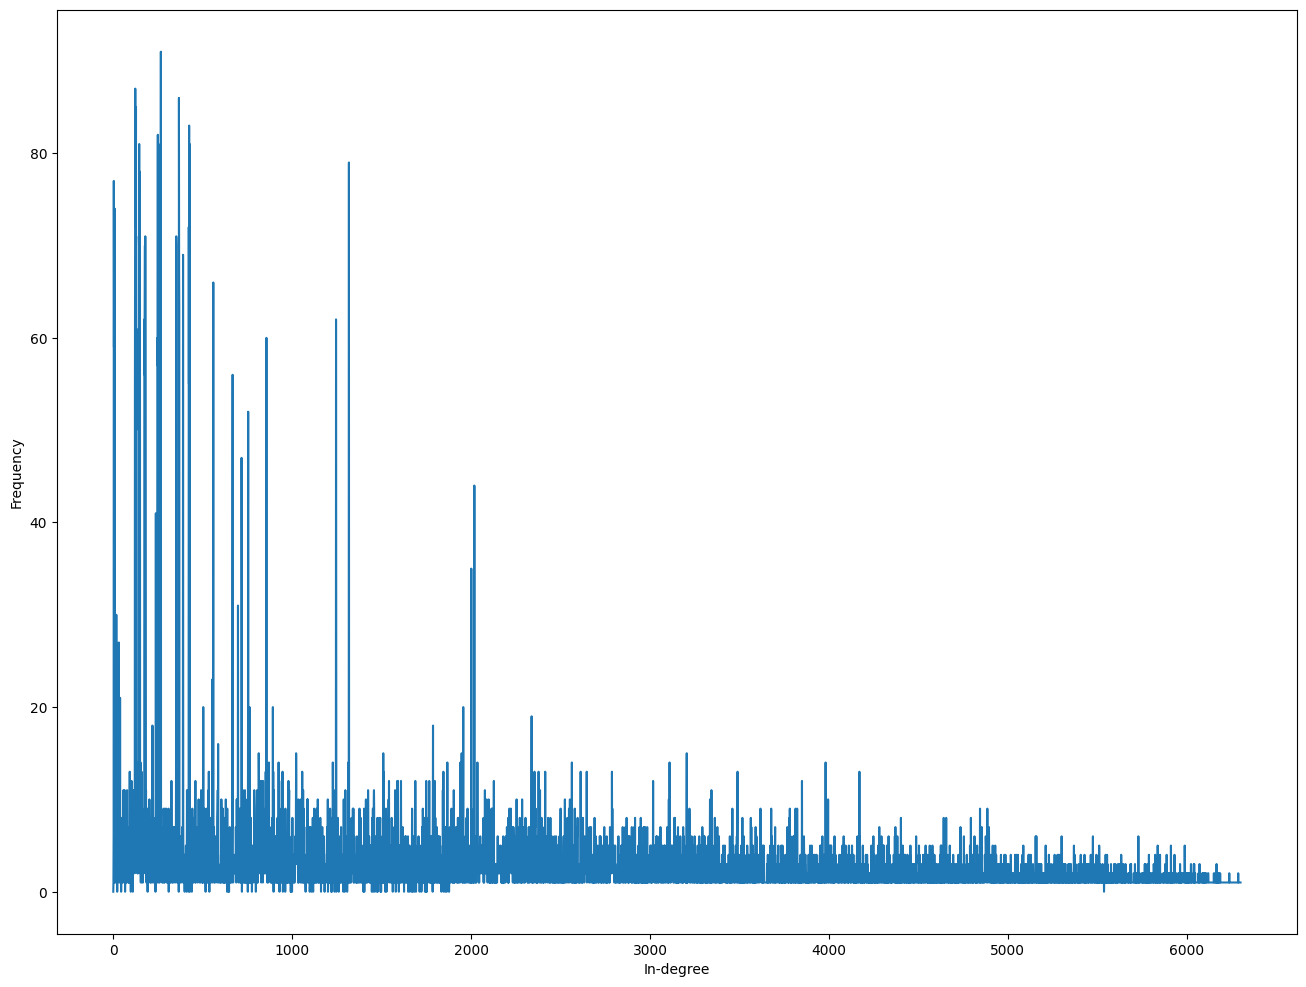

In [18]:
plt.figure(figsize=(16, 12)) 
plt.plot(range(len(list_indegree)), list_indegree ) 
plt.xlabel('In-degree')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

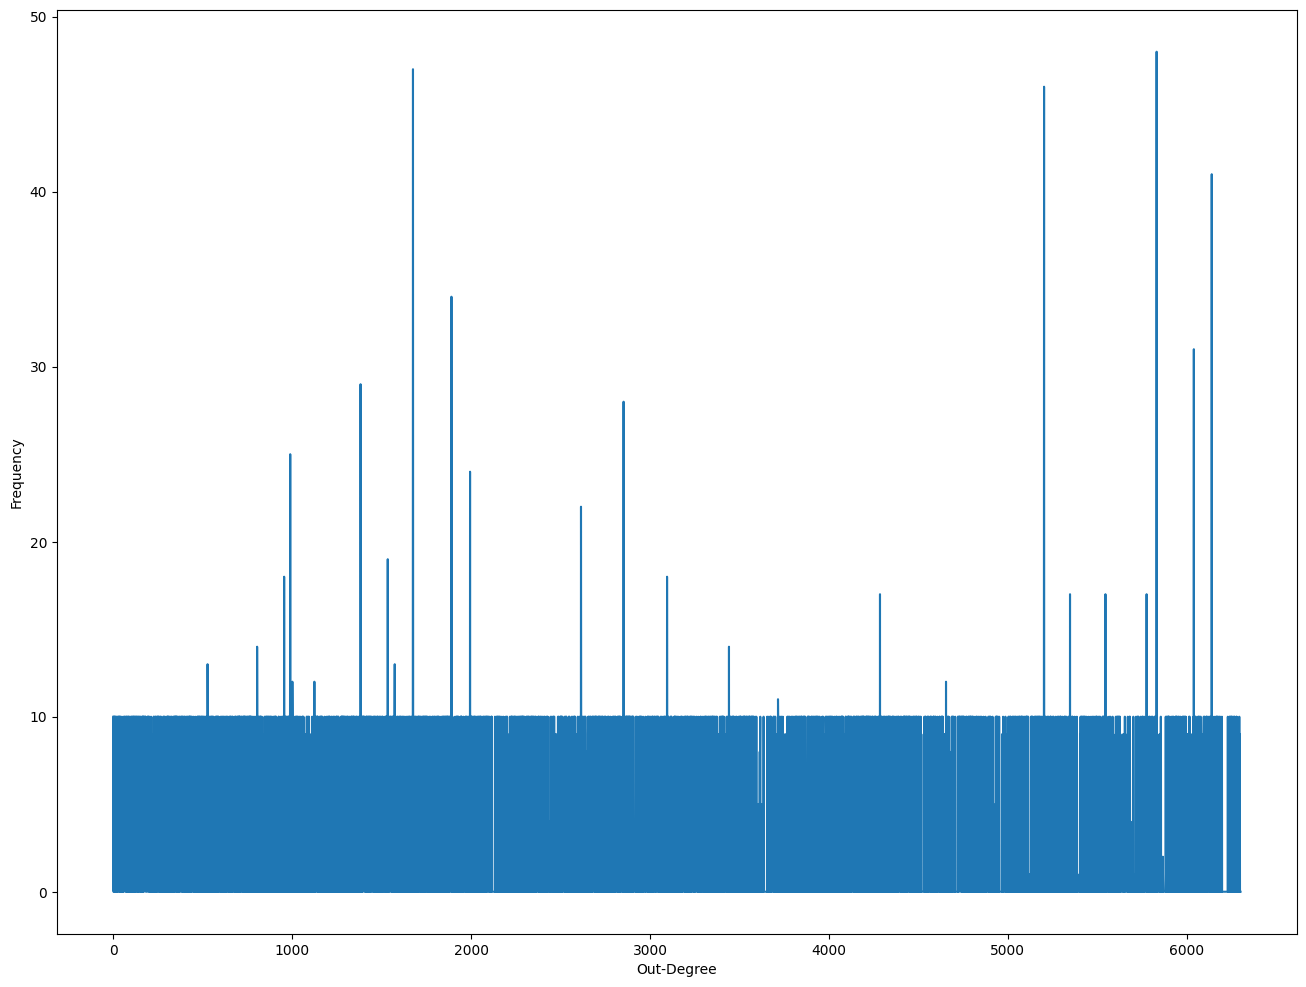

In [19]:
plt.figure(figsize=(16, 12)) 
plt.plot(range(len(list_outdegree)), list_outdegree) 
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')

In [20]:
lcc_coeff = {}
for node in adjacency_list:
   neighbours = adjacency_list[node]
   total_links = 0
   if len(neighbours) > 1:  
      for edge1 in neighbours:
        for edge2 in neighbours:
          if adjacency_matrix[edge1][edge2]==1:
            total_links +=1
      lcc_coeff[node] =  total_links/(len(neighbours)*(len(neighbours)-1))
   else:
      lcc_coeff[node] =  0

In [21]:
lcc_coeff

{0: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.044444444444444446,
 7: 0.08333333333333333,
 8: 0.0,
 9: 0.05555555555555555,
 11: 0.0,
 13: 0,
 14: 0,
 15: 0.08888888888888889,
 17: 0.0,
 20: 0.022222222222222223,
 21: 0.011111111111111112,
 22: 0.0,
 25: 0,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 0.1,
 31: 0.011111111111111112,
 32: 0.0,
 33: 0.0,
 36: 0.1,
 38: 0.0,
 39: 0.011111111111111112,
 43: 0.0,
 44: 0.0,
 49: 0.0,
 55: 0.0,
 60: 0.0,
 61: 0.0,
 62: 0.0,
 63: 0.0,
 64: 0.0,
 65: 0.0,
 66: 0.0,
 67: 0.0,
 68: 0.0,
 73: 0.0,
 75: 0.0,
 76: 0.0,
 78: 0.0,
 80: 0,
 81: 0.0,
 83: 0.022222222222222223,
 87: 0.0,
 89: 0.0,
 91: 0.16666666666666666,
 92: 0.0,
 98: 0.0,
 100: 0,
 101: 0.07777777777777778,
 102: 0.0,
 104: 0,
 105: 0.0,
 108: 0.0,
 109: 0.0,
 110: 0.0,
 111: 0.0,
 112: 0.0,
 113: 0.03333333333333333,
 116: 0.0,
 120: 0.044444444444444446,
 122: 0.0,
 123: 0.1,
 124: 0.07777777777777778,
 125: 0.0,
 126: 0.011111111111111112,
 127: 0.03333333333333333,
 129: 0.011111111111111112,
 130: 0.

## Calculating Clustering Coefficient

In [22]:
coeff = []
for value in lcc_coeff:
  coeff.append(lcc_coeff[value])
coeff = np.array(coeff)
unique,counts = np.unique(coeff, return_counts=True)

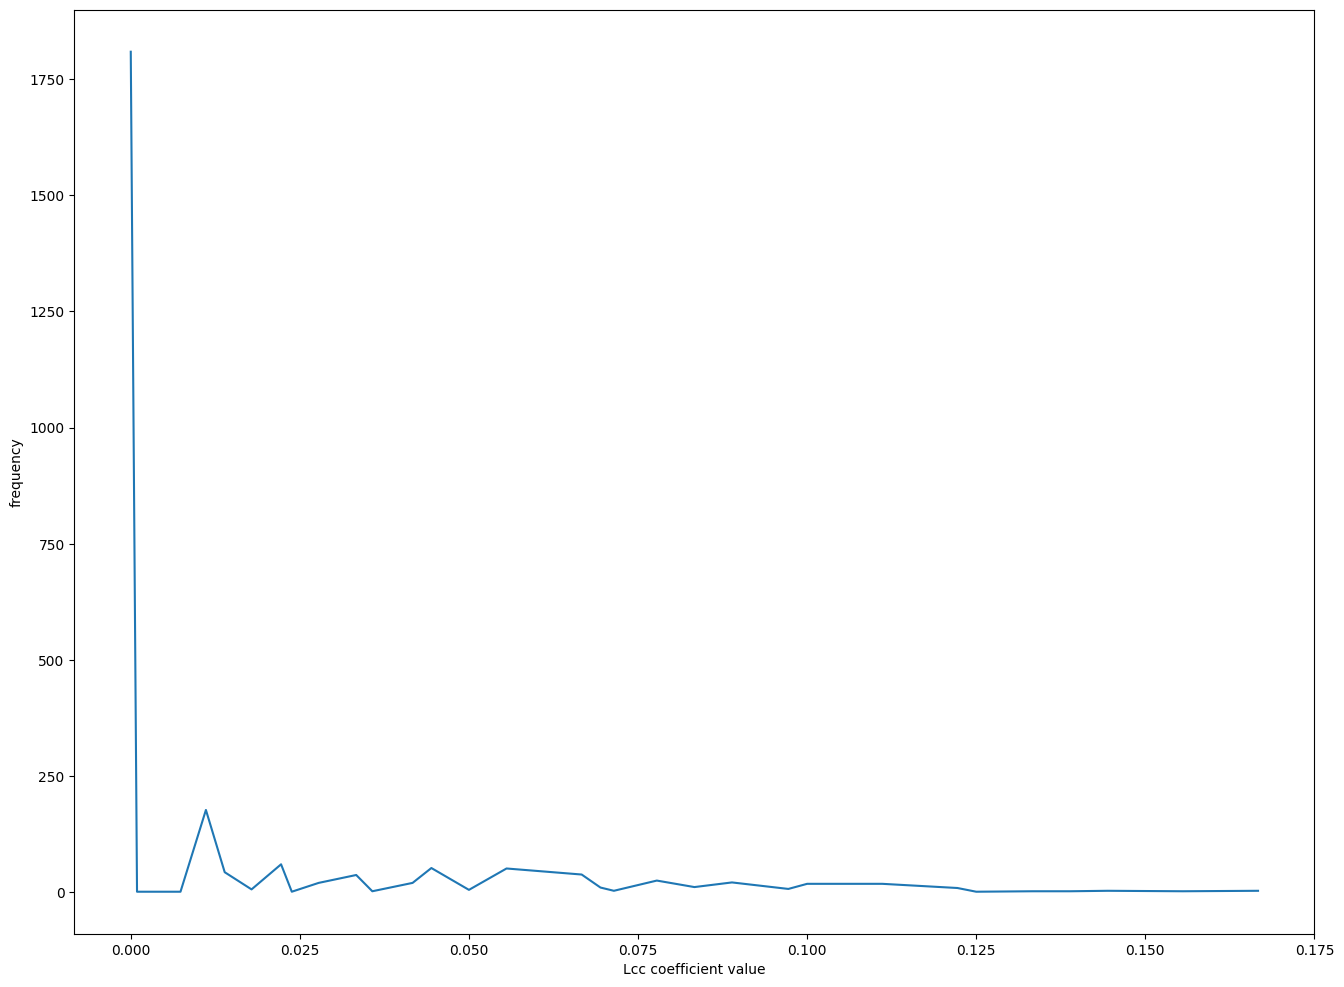

In [23]:
x = unique 
y = counts  
plt.figure(figsize = (16, 12)) 
plt.plot(x, y)
plt.xlabel('Lcc coefficient value')
plt.ylabel('frequency')
plt.show()